<a href="https://colab.research.google.com/github/anuva04/ML_Beginners/blob/main/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling
- it is a probabilistic algorithm as opposed to UCB which is a deterministic algorithm
- initally, the algorithm creates some distributions trying to guess where the actual distributions might lie
- then it picks up some values from the distributions of all the options
- now according to the picked values, the best option is chosen. it may not be the actual best option, but in the long run, the algorithm is more likely to choose the actual best option

# UCB vs Thompson Sampling
<table>
  <tr>
   <th> Upper Confidence Bound </th>
   <th> Thompson Sampling </th>
  </tr>
  <tr>
    <td> It is deterministic </td>
    <td> It is probabilistic </td>
  </tr>
  <tr>
    <td> Requires update after every round </td>
    <td> Can accomodate delayed feedback </td>
  </tr>
  <tr>
    <td> Not very strong empirical evidence </td>
    <td> Better empirical evidence </td>
  </tr>
</table>

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [68]:
import random
N = 10000
d = 10
ads_selected = []
# ith element in array stores number of times a reward of 1 was obtained for ith ad
numbers_of_rewards_1 = [0] * d
# ith element in array stores number of times a reward of 0 was obtained for ith ad
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

## Visualising the results - Histogram

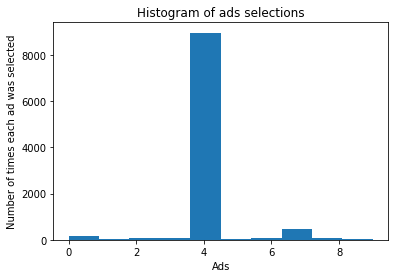

In [69]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

- around 80 rounds are required to determine the best option